# Funciones Extra

In [1]:
# Plot polynomials

def plotPoly(polys, name, L, R):
    x = var('x')
    a = plot([],figsize=(8, 8),title=name)
    classic_colors = ['crimson', 'blue', 'green', 'orange', 'purple', 'brown', 'red', 'yellow']
    n = len(polys)
    assert(n > 0)
    assert(len(L) == n and len(R) == n)
    for i in range(n):
        a += plot(polys[i], x, L[i], R[i], color=colors.keys()[i])
    show(a)

In [2]:
def Lagrange(points):
    #x = R.0
    var('x')
    n = len(points)
    assert(n > 1)
    ans = 0
    for i in range(n):
        act = points[i][1]
        for j in range(n):
            if i == j: continue
            act *= (x - points[j][0]) / (points[i][0] - points[j][0])
        ans += act
    return ans

In [3]:
def plotDerivative(points, method, name):
    n = len(points)
    assert(n > 1)
    h = points[1][0] - points[0][0]
    pointsdx = []
    for i in range(n):
        y = method(points, points[i][0], h)
        pointsdx.append((points[i][0], y))
    polys = []
    L = []
    R = []
    for i in range(n-1):
        P = Lagrange([pointsdx[i], pointsdx[i+1]])
        polys.append(P)
        L.append(pointsdx[i][0])
        R.append(pointsdx[i+1][0])
    plotPoly(polys, name, L, R)

# Método de los Cinco Puntos

In [4]:
from bisect import *

In [51]:
def CincoPuntos(points, x, h):
    assert(len(points) >= 5)
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    res = -1e10
    for tipo in range(5): # Will test every type 
        if tipo == 0:
            coef = [-25, 48, -36, 16, -3]    
        elif tipo == 1:
            coef = [-3, -10, 18, -6, 1]
        elif tipo == 2:
            coef = [1, -8, 0, 8, -1]
        elif tipo == 3:
            coef = [-1, 6, -18, 10, 3]
        else:
            coef = [3, -16, 36, -48, 25]
        start = x - tipo * h
        ans = 0
        found = True
        for i in range(5):
            pos = bisect_left(X, start - 1e-10)
            if pos == len(points) or abs(X[pos] - start) > 1e-9:
                found = False
                break
            ans += Y[pos] * coef[i]
            start += h
        if found:
            print(tipo, ans / 12 / h)
            res = ans / 12 / h
    assert(res > -1e10)
    return res

In [52]:
x = [(0, 75), (1, 69.9), (2, 65.3), (3, 61), (4, 57.4)]
print(CincoPuntos(x, 0, 1))

(0, -5.56666666666662)
-5.56666666666662


(0, -5.56666666666662)
(1, -4.76666666666668)
(2, -4.46666666666667)
(3, -4.06666666666665)
(4, -2.96666666666670)


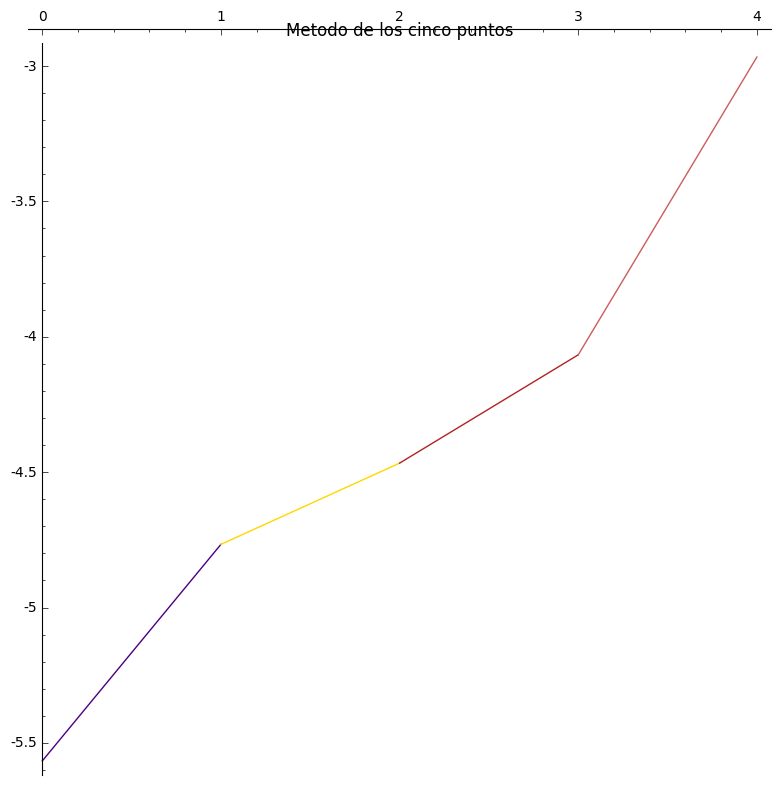

In [53]:
plotDerivative(x, CincoPuntos, "Metodo de los cinco puntos")

In [54]:
y = [(0.1,0.09950042), (0.2,0.19601332), (0.3,0.28660095), (0.4,0.36842440), (0.5,0.43879128), (0.6,0.49520137)]
print(CincoPuntos(y, 0.5, 0.1))

(3, 0.637891741666668)
(4, 0.637777616666667)
0.637777616666667


(0, 0.984926016666665)
(0, 0.940242141666669)
(1, 0.940356266666667)
(1, 0.866702858333333)
(2, 0.866664816666667)
(2, 0.765278825000000)
(3, 0.765316866666666)
(3, 0.637891741666668)
(4, 0.637777616666667)
(4, 0.486463308333331)


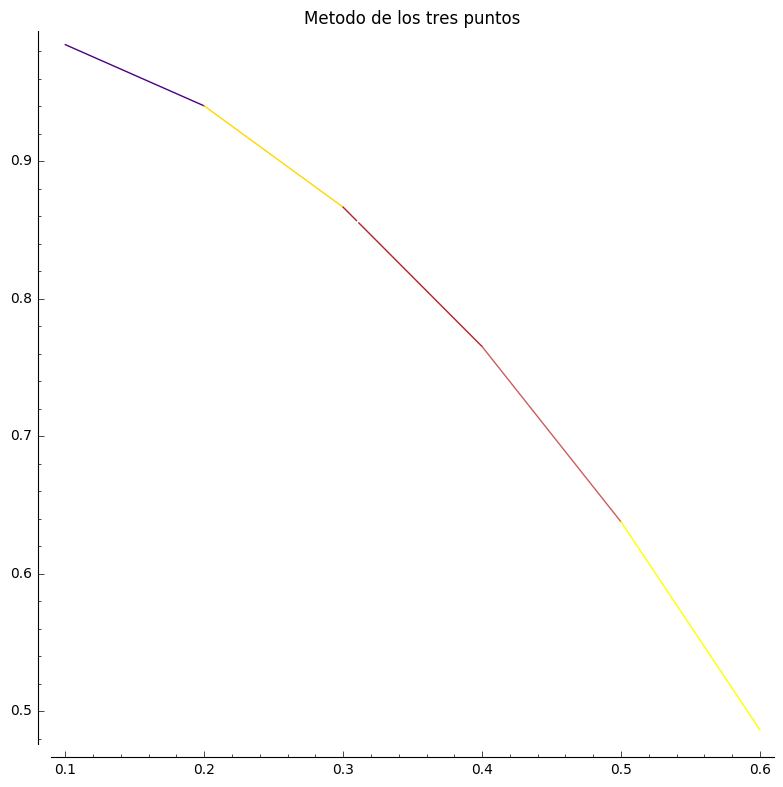

In [55]:
plotDerivative(y, CincoPuntos, "Metodo de los tres puntos")